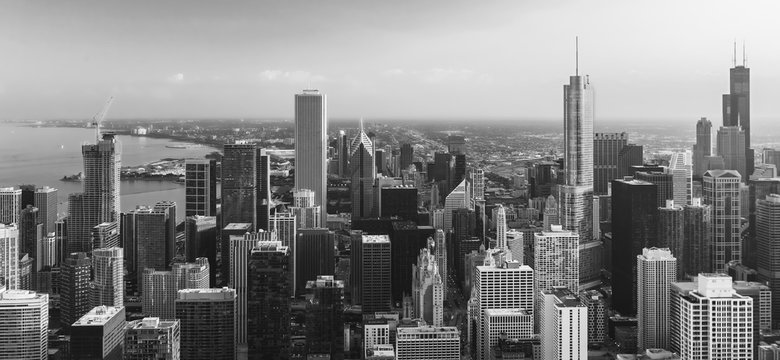

In [1]:
# Preparing library
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

raw_image = Image.open('./image.jpg').convert('L')
raw_image

In [2]:
# Convert image to matrix
raw_matrix = np.array(raw_image)
raw_matrix

array([[176, 176, 176, ..., 246, 246, 246],
       [177, 177, 177, ..., 246, 246, 246],
       [178, 178, 178, ..., 246, 246, 246],
       ...,
       [ 68,  62,  61, ..., 119,  89,  69],
       [ 45,  45,  49, ..., 126,  83,  55],
       [105, 110, 117, ..., 121,  82,  58]], dtype=uint8)

In [3]:
# Printing image dimension
print("Matrix dimensions:")
print("{:5s}".format("Image"), ":", raw_matrix.shape)

print()

# preparing svd decomposition
U, S, Vt = np.linalg.svd(raw_matrix, full_matrices=False)
print("Single Value Decomposition")
print("{:>5s}".format("U"), ":", U.shape)
print("{:>5s}".format("S"), ":", S.shape)
print("{:>5s}".format("Vt"), ":", Vt.shape)

Matrix dimensions:
Image : (360, 780)

Single Value Decomposition
    U : (360, 360)
    S : (360,)
   Vt : (360, 780)


In [4]:
# Function to get the compressed matrix using k value
def compress(k):
    U_k = U[:,:k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k,:]
    plt.plot(S)

    # dot product
    compressed_matrix = np.dot(np.dot(U_k, S_k), Vt_k)
    return compressed_matrix

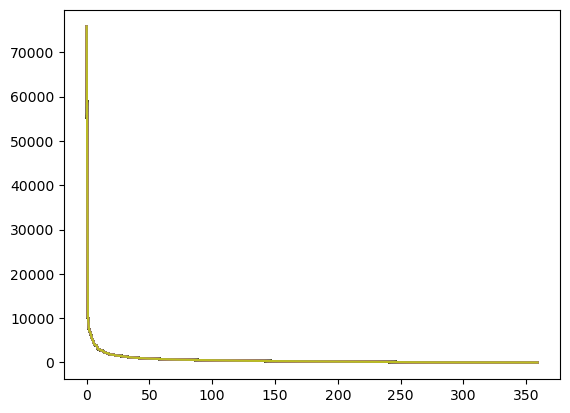

array([[175.99988873, 176.00037989, 175.99987709, ..., 245.99994528,
        245.9999822 , 245.99946311],
       [177.00049656, 176.99830468, 177.0005485 , ..., 246.00024417,
        246.00007943, 246.00239594],
       [177.99939012, 178.00208223, 177.99932632, ..., 245.9997001 ,
        245.99990244, 245.99705724],
       ...,
       [ 67.9999949 ,  62.00001741,  60.99999437, ..., 118.99999749,
         88.99999918,  68.9999754 ],
       [ 44.99999824,  45.00000599,  48.99999806, ..., 125.99999914,
         82.99999972,  54.99999153],
       [105.00000265, 109.99999096, 117.00000293, ..., 121.0000013 ,
         82.00000042,  58.00001278]])

In [5]:
compressed_matrix = np
for k in range(1, 360):
    compressed_matrix = compress(k)
plt.show()
compressed_matrix


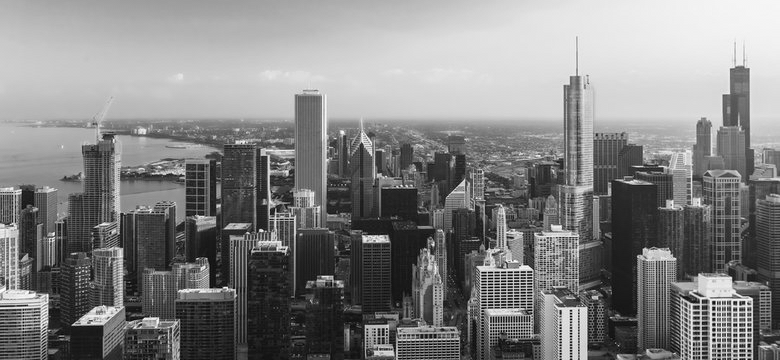

In [6]:
# Hapus nilai yang tidak di rentang 0 sampai 255
compressed_matrix = np.clip(compressed_matrix, 0, 255)

# Ubah jadi format gambar
compressed_matrix = compressed_matrix.astype(np.uint8)

# Bentuk gambar
compressed_image = Image.fromarray(compressed_matrix)
compressed_image.save("compressed_image.jpg")
compressed_image

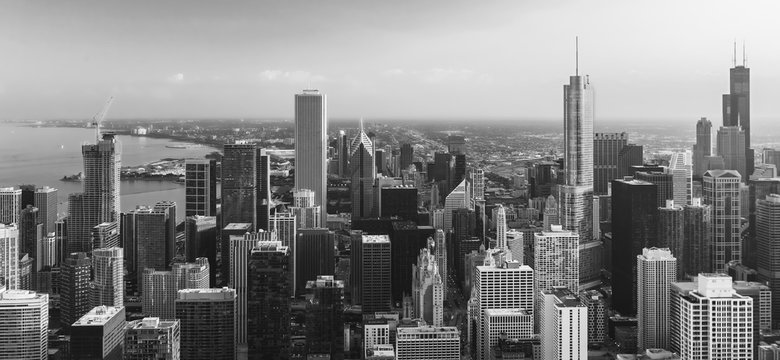

In [7]:
# Showing previously defined raw image
raw_image

In [8]:
# Mendapatkan ukuran gambar
import os

raw_size = os.path.getsize('image.jpg')
compressed_size = os.path.getsize('compressed_image.jpg')
compression_ratio = (1 - compressed_size / raw_size) * 100

print("Image size")
print("=" * 24)
print("{:10s}".format("Original"), ":", raw_size, "bytes")
print("{:10s}".format("Compressed"), ":", compressed_size, "bytes")
print("Image is {0:.2f}% smaller!".format(compression_ratio));

Image size
Original   : 96629 bytes
Compressed : 55615 bytes
Image is 42.44% smaller!
